1.Load Tweet Data

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Tweets.csv")

# Keep only required columns
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


2.Preprocess Tweets (Noise Removal)

In [9]:
import re

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)      # URLs
    text = re.sub(r"@\w+", "", text)                # Mentions
    text = re.sub(r"#", "", text)                   # Remove # symbol
    text = re.sub(r"[^\w\s]", "", text)             # Emojis & punctuation
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_tweet)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


3.Process Text Using spaCy

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")


4.Extract Lemmas & POS Tags

In [11]:
import spacy
import pandas as pd

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Example text (you can replace this with tweets from CSV)
text = "Flight was delayed again and the service was terrible"

# Process text
doc = nlp(text)

# Extract token, lemma, and POS
for token in doc:
    print(f"Token: {token.text}\tLemma: {token.lemma_}\tPOS: {token.pos_}")


Token: Flight	Lemma: flight	POS: NOUN
Token: was	Lemma: be	POS: AUX
Token: delayed	Lemma: delay	POS: VERB
Token: again	Lemma: again	POS: ADV
Token: and	Lemma: and	POS: CCONJ
Token: the	Lemma: the	POS: DET
Token: service	Lemma: service	POS: NOUN
Token: was	Lemma: be	POS: AUX
Token: terrible	Lemma: terrible	POS: ADJ


5.Custom spaCy Pipeline Component (Hashtag Detection)

In [12]:
from spacy.language import Language
from spacy.tokens import Doc

@Language.component("hashtag_detector")
def hashtag_detector(doc):
    hashtags = [token.text for token in doc if token.text.startswith("#")]
    doc._.hashtags = hashtags
    return doc

# Register extension
Doc.set_extension("hashtags", default=[], force=True)

# Add to pipeline
nlp.add_pipe("hashtag_detector", last=True)

nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'hashtag_detector']

6.Visual Analytics

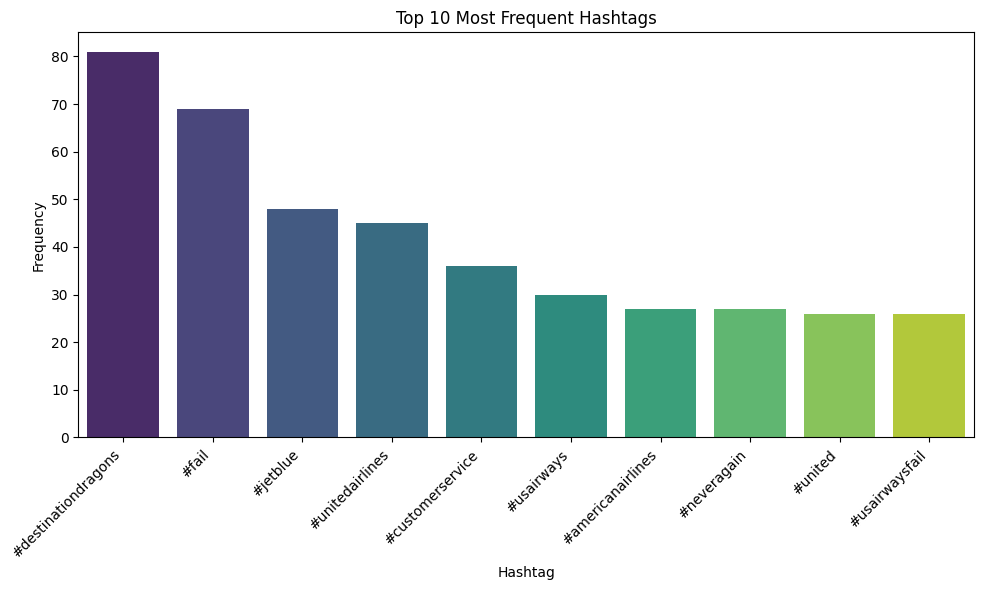

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import re
import seaborn as sns # Import seaborn

hashtags = []
for text in df['text']:
    hashtags.extend(re.findall(r"#\w+", text.lower()))

hashtag_freq = Counter(hashtags).most_common(10)

labels, values = zip(*hashtag_freq)

plt.figure(figsize=(10, 6)) # Increase figure size for better readability
sns.barplot(x=labels, y=values, hue=labels, palette='viridis', legend=False) # Use seaborn for a more appealing bar plot
plt.xticks(rotation=45, ha='right') # Rotate labels and align them to the right
plt.xlabel('Hashtag') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label
plt.title("Top 10 Most Frequent Hashtags") # Update title for clarity
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

7.POS Distribution in Negative Tweets

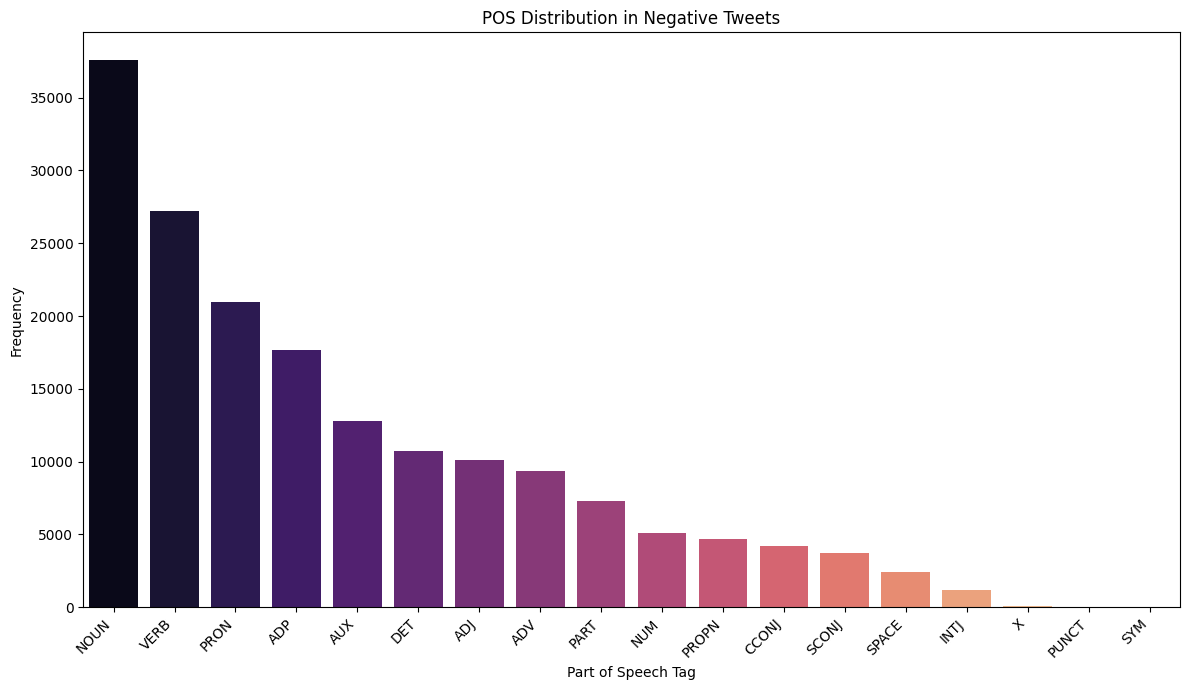

In [16]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

neg_df = df[df['airline_sentiment'] == 'negative']

pos_tags = []
for text in neg_df['clean_text']:
    doc = nlp(text)
    pos_tags.extend([token.pos_ for token in doc])

pos_freq = Counter(pos_tags)

# Sort POS tags by frequency for better visualization
sorted_pos_freq = dict(sorted(pos_freq.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 7)) # Increase figure size
sns.barplot(x=list(sorted_pos_freq.keys()), y=list(sorted_pos_freq.values()), hue=list(sorted_pos_freq.keys()), palette='magma', legend=False) # Use seaborn
plt.title("POS Distribution in Negative Tweets")
plt.xlabel("Part of Speech Tag") # Add x-axis label
plt.ylabel("Frequency") # Add y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are too crowded
plt.tight_layout() # Adjust layout
plt.show()